# Feature Engineering
## Import packages 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer

## Get DataFrame

In [10]:
init_housing = pd.read_csv("../data/regression/train.csv", index_col="Id")
init_housing.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Missing Values

In [18]:
numerical_features = init_housing.select_dtypes(include=["int64", "float64"]).columns.to_list()
categorical_features = init_housing.select_dtypes(exclude=["int64", "float64"]).columns.to_list()

num_imp = SimpleImputer(strategy="median")
cat_imp = SimpleImputer(strategy="constant", fill_value="N_A")

init_housing[numerical_features] = num_imp.fit_transform(init_housing[numerical_features])
init_housing[categorical_features] = cat_imp.fit_transform(init_housing[categorical_features])

## Prepare for Mutual Information Check

In [19]:
X = init_housing.copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [20]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

OverallQual      0.546964
GarageArea       0.365371
GarageCars       0.359460
KitchenQual      0.328096
MSSubClass       0.271533
YearRemodAdd     0.257266
FireplaceQu      0.208518
2ndFlrSF         0.194677
Fireplaces       0.160915
BsmtFinSF1       0.151324
OverallCond      0.120074
WoodDeckSF       0.116256
HalfBath         0.092377
SaleType         0.079921
BsmtExposure     0.073205
BedroomAbvGr     0.062244
PavedDrive       0.047089
EnclosedPorch    0.033367
LandContour      0.024552
BsmtFullBath     0.021645
Heating          0.015557
KitchenAbvGr     0.011182
MiscFeature      0.005937
MiscVal          0.003399
YrSold           0.000959
3SsnPorch        0.000000
MoSold           0.000000
Name: MI Scores, dtype: float64

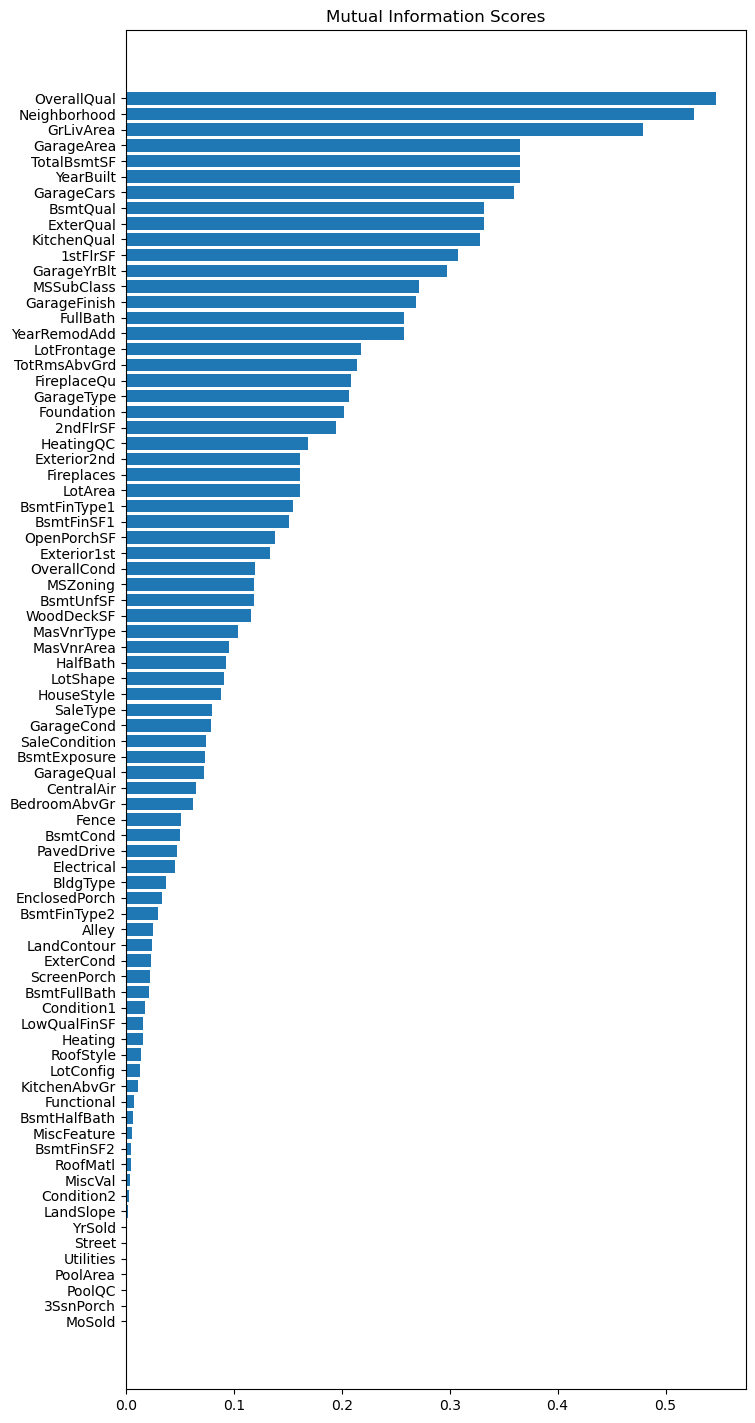

In [28]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 18))
plot_mi_scores(mi_scores)

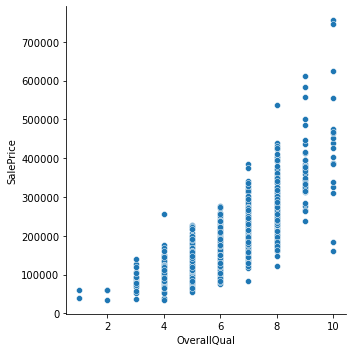

In [30]:
sns.relplot(x="OverallQual", y="SalePrice", data=init_housing)

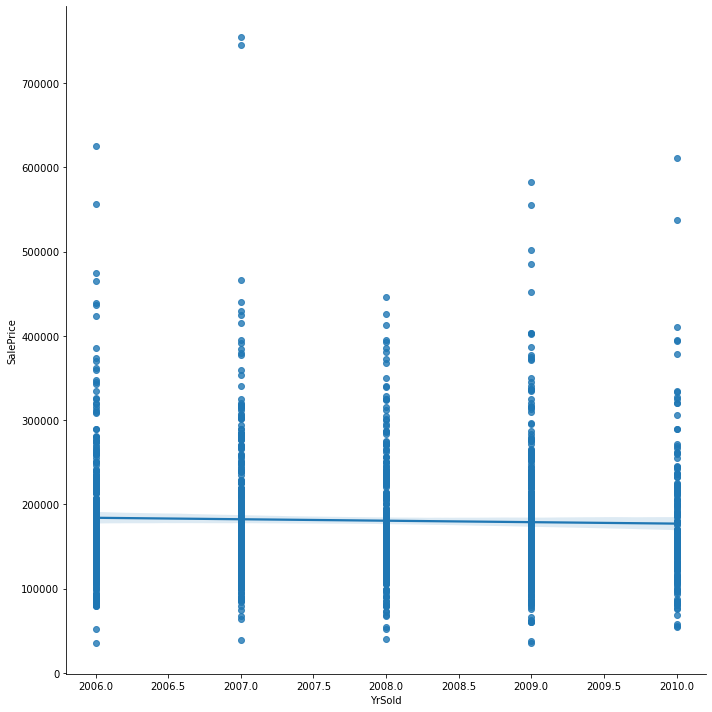

In [38]:

sns.lmplot( x="YrSold", y="SalePrice", data=init_housing, height=10)
